# Overview
The company is expanding into new industries to diversify its portfolio. The company has plans to purchase and operate aicrafts for both commercial and private use. Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. 

# Business problem
The biggest risk in the aviation industry is safety which might result to serious damages to a business and even more  for a new venture. The above may lead to brand damage and heavy financial implications. 

- Objective 1:To determine the relationship between flight category(private,commercial) and the extent of injuries.

- Objective 2:To analyze the relationship between aircraft make and model with injuries.

- Objective 3: To analyze aircraft damage in relation to engine type and no of engines.

Why : Conducting a risk assessment analysis enables the company to understand risks associated with different aircrafts. This will ensure reduced accident occurence,safer operations, and maximization of investments in the aircraft venture.

## **Stakeholders**
- ** Company Executives-people who needs insights before purchasing the flights
- ** Operations team for the company-team that will be handling the aircrafts



In this project, we will analyze the Aviation_Data.csv to be able to advise our client who is intrested in diversifying his business into aviation sector to be able to identify the lowest risk planes that he can buy.

## ** Importing Libraries and Loading Data**

In [720]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/Aviation_Data.csv')

# Display basic information
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (90348, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980



## **2. Structure of our dataset**
To view the data by using the few rows to be abbe to know what the data looks like.

In [721]:
# Inspecting our dataframe
df.info() # The data has 31 entries and the entries in the columns vary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## **3. Preview of the dataframe**
Let's view the first five rows to identify how our data looks like.

In [722]:
# reviewing last five columns of our data frame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [723]:
## A snippet of how the data looks like
df.info() # data has 88958 rows and 32 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## **3. Data Preparation**

Let's view the first five rows to identify how our data looks like.

#### Overview
After understanding our dataset, we will not take subsequent steps to be able to handle our data **Data Preparation**.
This will involve cleaning our data, formatting some rows as we prepare our data for analysis.

The main goals of this step are to:
1. Handle duplicates in our data  
2. Identify and handle missing values in our data  
3. Fix data types 
4. Identify columns to be used 
5. Create new columns for risk analysis
5. Ensuring data is ready for data analysis and visualization



## **3. Handling missing values and duplicates**

In [724]:
# Identifying the datasets in our dataframe
duplicated_data = df.duplicated().sum() # returns the sum of duplicates in the dataset

duplicated_data


1390

In [725]:
# dropping duplicates
df.drop_duplicates(inplace=True) # dropping the duplicates in our data


In [726]:
# To confirm that the duplicated have been dropped
df.duplicated().sum()

0

In [727]:
# percentage of missing values per column
missing_df= df.isna().sum()/len(df) * 100

missing_df


Event.Id                   0.077565
Investigation.Type         0.000000
Accident.Number            0.077565
Event.Date                 0.077565
Location                   0.136019
Country                    0.331617
Latitude                  61.350300
Longitude                 61.360417
Airport.Code              43.513793
Airport.Name              40.657389
Injury.Severity            1.201691
Aircraft.damage            3.668023
Aircraft.Category         63.705344
Registration.Number        1.558039
Make                       0.148385
Model                      0.180984
Amateur.Built              0.192226
Number.of.Engines          6.916747
Engine.Type                8.033004
FAR.Description           64.002113
Schedule                  85.856247
Purpose.of.flight          7.038153
Air.carrier               81.285550
Total.Fatal.Injuries      12.893725
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Uninjured            6.723398
Weather.Condition          5

In [728]:
# From the % missing values analysis,I dropped columns that have atleast 50% of the data missing and or
#  may not very critical for the analysis.
columns_to_drop = ['Latitude','Airport.Code','Airport.Name','Longitude','FAR.Description','Aircraft.Category','Air.carrier','Broad.phase.of.flight','Publication.Date','Schedule']

In [729]:
# checking the columns to confirm the columns selected have dropped

df = df.drop(columns= columns_to_drop)

df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause


For numerical columns, the NaN values are kept because they could clearly mean that
 -Total fatal injuries-either were not recorded or or there was simply no fatal injuries. The same applies for the other columns. Therefore, by keeping the NaN values, it will help in diriving insights.

In [730]:
#cols= ['Number.of.Engines',','Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured']

cols= ['Number.of.Engines']
#Getting the medians
medians={col: df[col].median() for col in cols}

#filling the numerical columns
for col in cols:
    df[col].fillna(medians[col],inplace=True)

In [731]:
# replacing Nan values in numerical columns with 0
cols= ['Total.Serious.Injuries','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured']


#filling the numerical columns with 0
for col in cols:
    df[col].fillna(0,inplace=True)

In [732]:
# converting columns with floats to integers

df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype(int)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype(int)
df['Total.Uninjured'] = df['Total.Uninjured'].astype(int)

# converting event date column to str to help in creating a new column with month and date
#df['Event.Date'] = df['Event.Date'].astype(str)

In [733]:
#handling placeholders in categorical columns
placeholders= ['Unk', 'UNK','LR','N/A','na','nan','-','','None','NONE']

df = df.replace(placeholders,'Unknown')

df = df.fillna('Unknown')


In [734]:
# Filling the categorical data with Unknown since we dont want to fill them with mode.

cols_to_fill= ['Registration.Number','Engine.Type','Location','Injury.Severity','Aircraft.damage','Aircraft.damage','Weather.Condition','Report.Status','Purpose.of.flight']

df[cols_to_fill] = df[cols_to_fill].fillna('Unknown')



In [749]:
#dropping rows with missing values
df= df.dropna(subset=['Event.Id','Accident.Number','Event.Date','Make','Model','Country','Amateur.Built','Event.Date'])


In [736]:
# Confirming if all missing values have been handled
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

In [737]:
# Display basic information
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (88958, 21)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,No,1,Reciprocating,Personal,2,0,0,0,Unknown,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,No,1,Reciprocating,Personal,4,0,0,0,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,No,1,Reciprocating,Personal,3,0,0,0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,No,1,Reciprocating,Personal,2,0,0,0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,No,1,Unknown,Personal,1,2,0,0,VMC,Probable Cause


In [738]:
df.info() # From the data, we are now remaining with 88958 rows and 21 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88958 non-null  object
 1   Investigation.Type      88958 non-null  object
 2   Accident.Number         88958 non-null  object
 3   Event.Date              88958 non-null  object
 4   Location                88958 non-null  object
 5   Country                 88958 non-null  object
 6   Injury.Severity         88958 non-null  object
 7   Aircraft.damage         88958 non-null  object
 8   Registration.Number     88958 non-null  object
 9   Make                    88958 non-null  object
 10  Model                   88958 non-null  object
 11  Amateur.Built           88958 non-null  object
 12  Number.of.Engines       88958 non-null  int32 
 13  Engine.Type             88958 non-null  object
 14  Purpose.of.flight       88958 non-null  object
 15  To

In [739]:
df.shape #From the data, we are now remaining with 88958 rows and 21 columns

(88958, 21)

#### Mapping columns
- Mapping columns will help to replace, transform, or standardize values in a DataFrame column as well as engineer new feautures.

In [740]:
df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [741]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].astype(str)

In [742]:
# mapping of Purpose.of.flight column

def purpose_mapper(purpose):
    if purpose in ['Personal','Instructional','Glider Tow','Executive/corporate','Skydiving']:
         return 'Private'
    elif purpose in ['Business','Ferry','Aerial Observation','Aerial Application','Public Aircraft','Other Work Use','Positioning','Flight Test','Air Race/show',
                   'Air Drop','Public Aircraft - Federal','Glider Tow','Public Aircraft - Local','External Load','Public Aircraft - State', 'Banner Tow',
                   'Firefighting','Air Race show','PUBS','ASHO','PUBL']:
        return 'Commercial'
    else:
        return 'Unknown'


In [743]:
df['Flight.Category'] = df['Purpose.of.flight'].map(purpose_mapper)


In [744]:
df['Flight.Category'].unique()

array(['Private', 'Unknown', 'Commercial'], dtype=object)

In [752]:
df['Event.Date']= pd.to_datetime(df['Event.Date'],errors='coerce')

df =df.dropna(subset=['Event.Date'])

df['Year'] = df['Event.Date'].dt.year
print(df)

             Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
90343  20221227106491           Accident      ERA23LA093 2022-12-26   
90344  20221227106494           Accident      ERA23LA095 2022-12-26   
90345  20221227106497           Accident      WPR23LA075 2022-12-26   
90346  20221227106498           Accident      WPR23LA076 2022-12-26   
90347  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country Injury.Severity Aircraft.damage  \
0      MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   
1

In [753]:
df['Year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
90343    2022
90344    2022
90345    2022
90346    2022
90347    2022
Name: Year, Length: 88889, dtype: int64

## Summary Statistics
Summary statistics will help us describe complex datasets and condencing them in key features like central tendencies and  and disperion.

In [ ]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88958.000000,88958.000000,88958.000000,88958.000000,88958.000000
mean,1.136446,0.564322,0.240304,0.308887,4.967389
std,0.432394,5.124684,1.434073,2.082924,26.991892
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## DATA Analysis & Visualization
The objective for this section is to calculate risk metrics and produce clear recommendationst to support business recommendation for our client.

We will be able to create multiple views on:
1. Trends of accident over time
2. Fatality and Injuries from flight category
3. To analyze the relationship between aircraft make and model with injuries.
4. Aircraft damage in relation to engine type and no of engines.

# OBJECTIVE 1:
-To determine the trend of accidents over the years

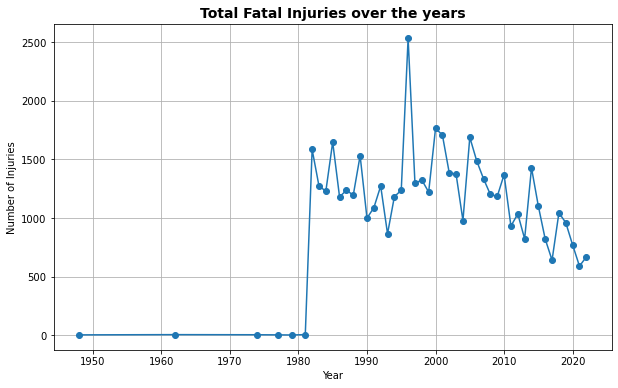

In [755]:
accidents_per_year = df.groupby('Year')['Total.Fatal.Injuries'].sum().reset_index()

# plotting the graph
plt.figure(figsize=(10,6))
plt.plot(accidents_per_year['Year'],accidents_per_year['Total.Fatal.Injuries'],marker='o')
plt.title('Total Fatal Injuries over the years', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()

From the graph, accidents were very few from 1950 and 1980, the accidents then spiked afterwards and it had been drastically been reducing ver the years from 2000 to date

# OBJECTIVE 1:
-To determine the relationship between flight category (private,commercial) and the extent of injuries.

In [ ]:
# injuries by Flight category
flight_summary= df.groupby('Flight.Category')[['Total.Fatal.Injuries',
                                              'Total.Serious.Injuries',
                                              'Total.Minor.Injuries']].sum()
                                              
print(flight_summary)                                        

                 Total.Fatal.Injuries  Total.Serious.Injuries  \
Flight.Category                                                 
Commercial                       5616                    3046   
Private                         21523                   12387   
Unknown                         23062                    5944   

                 Total.Minor.Injuries  
Flight.Category                        
Commercial                       3776  
Private                         15277  
Unknown                          8425  


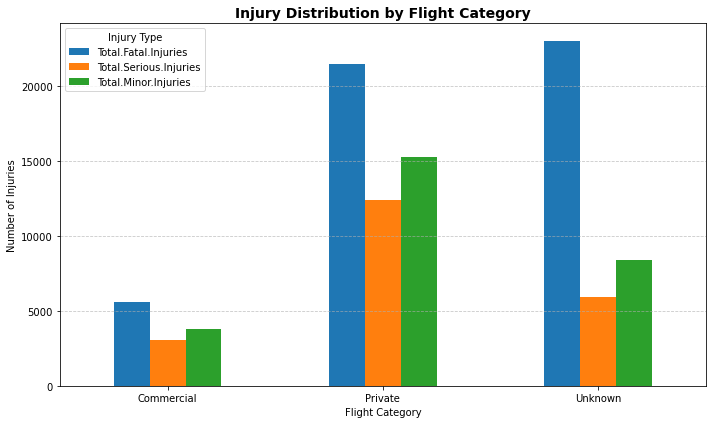

In [ ]:
data = {
    'Total.Fatal.Injuries': [5616, 21523, 23062],
    'Total.Serious.Injuries': [3046, 12387, 5944],
    'Total.Minor.Injuries': [3776, 15277, 8425]
}
index = ['Commercial', 'Private', 'Unknown']
flight_injuries = pd.DataFrame(data, index=index)

# Plot
flight_injuries.plot(kind='bar', figsize=(10,6))
plt.title('Injury Distribution by Flight Category', fontsize=14, fontweight='bold')
plt.xlabel('Flight Category')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.legend(title='Injury Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Conclusion-Flight category

- From the analysis, it's clear that private planes have a high injury count as compared to the commercial planes.  

- Additionally, private planes reported the highest numbers of injuries overally with 21,523 fatalities, 12,387 serious injuries and 15,277 minor injuries. This could means,private plates experinece significant more fatalities and injuries maybe due to their size, less rigorous maintenance and maybe inexperienced pilots.

- Unknown category-23,062 fatal injuries. Since the data has alot of unclassifies and unreported flights, there might be incomplere data to conclusively interptrate this.

- Commercial categories
From the analysis, they have reported the lowest number of injuries with 5,616 fatalities,3,036 serious injries and 3,776 minor injuries.
Commercial flights have the best safety records due to stict safety regulations, experienced crews and advanced aircraft technologies.

- Therefore based on this, private aircrafts show most injuies across all categories, making them a riskkier for business operations. Comercial aircrafts remain the safest option wuth lowest fatalities and injuries. It will be prudent to advise the client to base his enterprise more on commercial planes than private planes. Commercial planes are the better safer option and also reliable.

# OBJECTIVE 2
-To analyze the relationship between aircraft make and model with injuries.

In [ ]:
# make and model vs fatality
# Finding unique values in mak column
df['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [ ]:
df['Make'].value_counts()

Cessna                  22227
Piper                   12029
CESSNA                   4922
Beech                    4330
PIPER                    2841
                        ...  
Alvin R. Kemmet             1
COMMONWEALTH                1
Bourgeois-avid Flyer        1
Mosley High School          1
Schicora                    1
Name: Make, Length: 8237, dtype: int64

In [ ]:
# converting the Make column to be all lower case

df['Make'] = df['Make'].str.lower()

In [ ]:
# injuries by Flight category
make_summary_injuries= (df.groupby('Make')[['Total.Fatal.Injuries',
                                              'Total.Serious.Injuries',
                                              'Total.Minor.Injuries']]
                         .sum()
                         .sort_values(by='Total.Fatal.Injuries',ascending=False)
                         .head(10)
                         .reset_index()
)


print(make_summary_injuries)

                Make  Total.Fatal.Injuries  Total.Serious.Injuries  \
0             cessna                  9641                    4894   
1             boeing                  8748                    2157   
2              piper                  6689                    3059   
3              beech                  3784                    1095   
4               bell                  1332                     878   
5             airbus                  1325                     192   
6  mcdonnell douglas                  1286                     556   
7   airbus industrie                  1174                     138   
8            douglas                   984                     105   
9             mooney                   685                     248   

   Total.Minor.Injuries  
0                  6876  
1                  2761  
2                  3757  
3                  1341  
4                  1122  
5                   106  
6                  1505  
7                   3

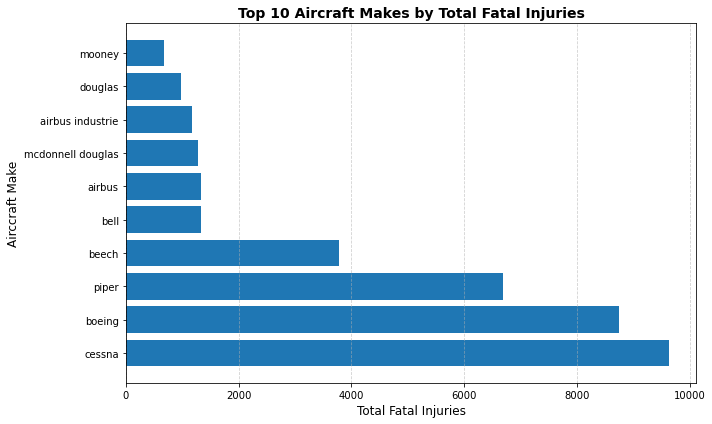

In [ ]:
# GRAPH VISUALIZATION

import matplotlib.pyplot as plt
%matplotlib inline
make_summary_injuries= (df.groupby('Make')[['Total.Fatal.Injuries',
                                              'Total.Serious.Injuries',
                                              'Total.Minor.Injuries']]
                         .sum()
                         .sort_values(by='Total.Fatal.Injuries',ascending=False)
                         .head(10)
                         .reset_index()
)

#Plot
plt.figure(figsize=(10,6))
plt.barh(make_summary_injuries['Make'],make_summary_injuries['Total.Fatal.Injuries'])
plt.title('Top 10 Aircraft Makes by Total Fatal Injuries',fontsize=14,fontweight='bold')
plt.xlabel('Total Fatal Injuries',fontsize=12)
plt.ylabel('Airccraft Make', fontsize=12)
plt.grid(axis='x',linestyle='--',alpha=0.6)

#Display
plt.tight_layout()
plt.show()

#### Conclusion-Make
- From the analysis, the top 10 aircrafts with the highest number of falaties are cessna, boeing, piper , beech etc have the highest number of fatalities. If we fully  depended on this data to advise the client, then we would recommend other crafts that do not have hifg record of fatalities for this business.

- Comparing the aircraft make, might help us decide on which model to purchase depending on how many accidents they are involved in.

# OBJECTIVE 3
-To analyze aircraft damage in relation to engine type and no of engines.

In [ ]:
df.groupby('Engine.Type')['Aircraft.damage'].value_counts(normalize=True)

Engine.Type      Aircraft.damage
Electric         Substantial        0.800000
                 Destroyed          0.200000
Geared Turbofan  Unknown            0.916667
                 Minor              0.083333
Hybrid Rocket    Destroyed          1.000000
Reciprocating    Substantial        0.773839
                 Destroyed          0.208960
                 Minor              0.012268
                 Unknown            0.004933
Turbo Fan        Unknown            0.356711
                 Substantial        0.294236
                 Minor              0.270052
                 Destroyed          0.079000
Turbo Jet        Substantial        0.332859
                 Unknown            0.237553
                 Minor              0.230441
                 Destroyed          0.199147
Turbo Prop       Substantial        0.600118
                 Destroyed          0.237983
                 Minor              0.090239
                 Unknown            0.071660
Turbo Shaft      Subst

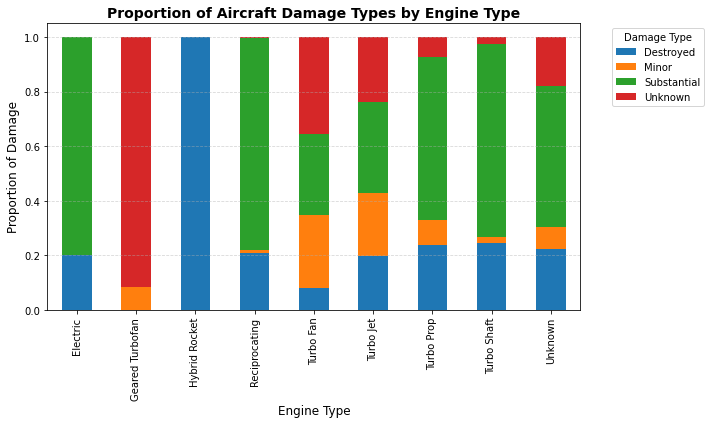

In [ ]:
#data visualization

# Recreate your normalized summary
damage_by_engine = (
    df.groupby('Engine.Type')['Aircraft.damage']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# Plot stacked bar chart
damage_by_engine.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Proportion of Aircraft Damage Types by Engine Type', fontsize=14, fontweight='bold')
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Proportion of Damage', fontsize=12)
plt.legend(title='Damage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Conclusion-Engine Type Vs Aircraft damage
From the above analysis, reciprocating engines, usually used in small and private aicrafts, usually show hugh proprotiones of being destroyed or to undergo substantial damage possibly due to their small structure and general-use conditions.

For Turbo Fan and Turbo Jet engines(used in commercial planes), often show lower proportions of complete destruction, since those planes follow stricter maintenance and operational procedures.

Turbo Prop and Turbo Shaft engines have moderate proportions of damage.

Unknown and Electric/Hybrid engine types, they're likely rare and data may be incomplete.

In [ ]:
df.groupby('Number.of.Engines')['Aircraft.damage'].value_counts(normalize=True)

Number.of.Engines  Aircraft.damage
0                  Substantial        0.686786
                   Destroyed          0.141109
                   Unknown            0.111746
                   Minor              0.060359
1                  Substantial        0.755490
                   Destroyed          0.204608
                   Unknown            0.022816
                   Minor              0.017086
2                  Substantial        0.529651
                   Destroyed          0.259139
                   Unknown            0.112375
                   Minor              0.098836
3                  Minor              0.407867
                   Unknown            0.325052
                   Substantial        0.215321
                   Destroyed          0.051760
4                  Minor              0.336427
                   Substantial        0.264501
                   Unknown            0.264501
                   Destroyed          0.134571
6                  Substa

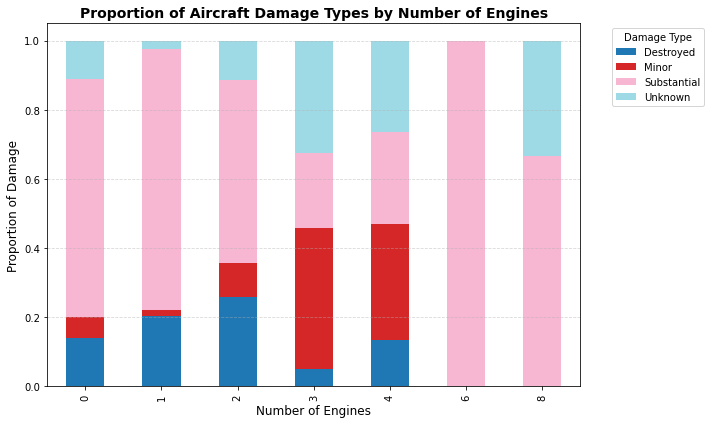

In [ ]:
# Data visualization # Group and normalize again (in case you haven’t already)
damage_by_engines = (
    df.groupby('Number.of.Engines')['Aircraft.damage']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# Plot
damage_by_engines.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

plt.title('Proportion of Aircraft Damage Types by Number of Engines', fontsize=14, fontweight='bold')
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Proportion of Damage', fontsize=12)
plt.legend(title='Damage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Conclusion-Engine Type Vs Damage
- Single engine aircraft(1 engine) have the highest proporton of substantial damage of about 75%.

- They are closely folowed by destroyes at 20% and only a small proprportion of minor or unknown damage.
Interpratation- Single engine planes are more vulnerable to substantial or complte damage in accidents.

- Two engines-Substantial dama(53%),Destroyed(25%), minor(10%) and unknown(11%).  Two engine are failrly better than single engines.

- Aircrafts with 6 and eight engines, their substantial damage is rare and small for 6-enginse and 67% for 8-engine.

Overal insights. 

- Substantial damage are common in all engine types.
Planes with (3-4) engines appear to reduce the proportion of severe outcomes maybe due to better safety features.

- Single engine are the most risk in terms of damage.


#### Recommendations
Based on the analysis, it is advisable for the client to invest primarily in commercial aircrafts. They are proven and demonstrate t be superior, safer, reliable. Private planes though common have higher accidents and may require stricter maintenance and qualifies human resourse.

Preference should also be given to planes with multiple engines and turbo-powered models with proven safety records.

Avoid aircrafts with consistenly high accident records and prioritize those that demonstrate safety.


Engine type is a a key factor. Commercial grade engines demonstrate better durability and lower destruction rates as compared to those in small private aircrafts.

-Companies should purchase aircrafts with more than three engines as they have a reduces proporion of severe aircraft damage.


In [ ]:
df.to_csv('cleaned_Aviation_Data',index=False)